# 1. First Bad Version

You are a product manager and currently leading a team to develop a new product.   Unfortunately, the latest version of your product fails the quality check. Since each version is developed based on the previous version, all the versions after a bad version are also bad.  

Suppose you have n versions [1, 2, ..., n] and you want to find out the first bad one, which causes all the following ones to be bad.  

You are given an API bool isBadVersion(version) which will return whether version is bad. Implement a function to find the first bad version. You should minimize the number of calls to the API.  

Example:

Given n = 5, and version = 4 is the first bad version.  

call isBadVersion(3) -> false  
call isBadVersion(5) -> true  
call isBadVersion(4) -> true  

Then 4 is the first bad version.

In [ ]:
def firstBadVersion(self, n):
    """
    :type n: int
    :rtype: int
    """
    l = 1
    r = n
    while l <= r:
        mid = (l+r)//2
        if isBadVersion(mid):
            r = mid - 1
        else:
            l = mid + 1
    return l

# 2.  Jewels and Stones

You're given strings J representing the types of stones that are jewels, and S representing the stones you have.  Each character in S is a type of stone you have.  You want to know how many of the stones you have are also jewels.

The letters in J are guaranteed distinct, and all characters in J and S are letters. Letters are case sensitive, so "a" is considered a different type of stone from "A".

Example 1:  
Input: J = "aA", S = "aAAbbbb"   
Output: 3  

Example 2:  
Input: J = "z", S = "ZZ"  
Output: 0

**My Solution--violent search**

In [20]:
def numJewelsInStones(J, S) -> int:
    count = 0
    for s in S:
        for j in J:
            if s == j :
                count += 1
    return count

In [33]:
def numJewelsInStones2(J, S) -> int:
    return sum(s in J for s in S)
#a in b
#if found element "a" in sequence b, return True, else False

In [35]:
def numJewelsInStones3(J, S) -> int:
    return sum(map(J.count, S))
#python: string.count(str, begin=0, end=len(string)) return the times of str shows up in string
#map(function, iterable, ...)

In [41]:
J = "aA"
S = "aAAbbbb"
numJewelsInStones3(J,S)

3

# 3. Ransom Note

Given an arbitrary ransom note string and another string containing letters from all the magazines, write a function that will return true if the ransom note can be constructed from the magazines ; otherwise, it will return false.

Each letter in the magazine string can only be used once in your ransom note.  

Note:  
You may assume that both strings contain only lowercase letters.  

canConstruct("a", "b") -> false  
canConstruct("aa", "ab") -> false  
canConstruct("aa", "aab") -> true

In [23]:
def canConstruct(ransomNote, magazine) -> bool:
    if not ransomNote:
        return True

    for i in set(ransomNote): #avoid repeatation
        if ransomNote.count(i) >  magazine.count(i):
            return False
    return True

In [24]:
ransomNote = "fihjjjjei"
magazine = "hjibagacbhadfaefdjaeaebgi"
canConstruct(ransomNote, magazine)        

False

# 4. Number Complement

Given a positive integer, output its complement number. The complement strategy is to flip the bits of its binary representation.

 

Example 1:

Input: 5  
Output: 2  
Explanation: The binary representation of 5 is 101 (no leading zero bits), and its complement is 010. So you need to output 2.  
  

Example 2:

Input: 1  
Output: 0  
Explanation: The binary representation of 1 is 1 (no leading zero bits), and its complement is 0. So you need to output 0.
 

**Solution1--XOR each bit**

In [30]:
def findComplement(num) -> int:
    i = 1
    while i <= num:
        num ^= i
        i <<= 1
    return num
#XOR ^ -> 5^1^2^4 -> 0101^0001^0010^0100

# Runtime: 32 ms
# Memory Usage: 13.7 MB

**Solution2--Create mask code**

In [37]:
def findComplement2(num):
    n=num
    mask=1
    while(n>0):
        mask=mask<<1
        n=n>>1
    return (mask-1)^num

**Solution3-- len(bin(num))-2 >> full bits 1 - num >> result**

In [40]:
def findComplement3(num):
    return num ^ 2 ** (len(bin(num))-2) - 1 #len(bin(num))-2 --- bits without 0 in front of list 
#Runtime: 28 ms
#Memory Usage: 13.8 MB

In [48]:
print(findComplement3(5))
print(findComplement3(1))
bin(5)

2
0


'0b101'

# 5. First Unique Character in a String

Given a string, find the first non-repeating character in it and return it's index. If it doesn't exist, return -1.  

Examples:  
s = "leetcode"  
return 0.  

s = "loveleetcode",  
return 2.  

Note: You may assume the string contain only lowercase letters.

**My Solution -- Violent Search**

In [33]:
def firstUniqChar(s) -> int:
    for i in s:
        if s.count(i)==1:
            return s.find(i)
    return -1

In [43]:
def firstUniqChar2(s) -> int:
    for i in range(len(s)):
        if s.count(s[i])==1:
            return i
    return -1

**Solution3 - Use collections.defaultdict, trannversal in s, append every index to element**

In [91]:
def firstUniqChar3(s) -> int:
    from collections import defaultdict
    d = defaultdict(list)
    for i in range(len(s)):
        d[s[i]].append(i)
    for j in d:
        if len(d[j])==1: #letter have only 1 index ,return it
            return d[j][0]
    return -1

**Solution4 - Use collections.Counter, count num of each letter. tranversal in s, return its index if count=1**

In [97]:
def firstUniqChar4(s) -> int:
    from collections import Counter 
    d = Counter(s)
    for i in range(len(s)):
        if d[s[i]] == 1:
            return i
    return -1

**Solution5 - base on Solution4, enumerate >> (index,every letter)**

In [107]:
def firstUniqChar5(s) -> int:
    from collections import Counter
    d = Counter(s)
    for i,j in enumerate(s):
        if d[j]==1:
            return i
    return -1

In [111]:
s = "leetcode"
firstUniqChar5(s)

Counter({'e': 3, 'l': 1, 't': 1, 'c': 1, 'o': 1, 'd': 1})


0

# 6. Majority Element

Given an array of size n, find the majority element. The majority element is the element that appears more than ⌊ n/2 ⌋ times.    
You may assume that the array is non-empty and the majority element always exist in the array.  

Example 1:  
Input: [3,2,3]  
Output: 3  

Example 2:  
Input: [2,2,1,1,1,2,2]  
Output: 2

**MY SOLUTION - collections.Counter+Hash, totally master this method!!!**

In [12]:
def majorityElement(nums) -> int:
    from collections import Counter 
    d = Counter(nums)
    for num in nums:
        if d[num] > len(nums)/2:
            return num
# Runtime: 160 ms
# Memory Usage: 15.2 MB

In [25]:
def majorityElement2(nums) -> int:
    d = dict()
    for i in range(len(nums)):
        if nums[i] not in d:
            d[nums[i]] = 1
        else:
            d[nums[i]] += 1
        if d[nums[i]] > len(nums)/2:
            return nums[i] 
# Runtime: 192 ms
# Memory Usage: 15.2 MB

In [26]:
nums1 = [3,2,3]
nums2 = [2,2,1,1,1,2,2]
majorityElement2(nums2)

2

# 7. Cousins in Binary Tree

In a binary tree, the root node is at depth 0, and children of each depth k node are at depth k+1.  
Two nodes of a binary tree are cousins if they have the same depth, but have different parents.  
We are given the root of a binary tree with unique values, and the values x and y of two different nodes in the tree.  
Return true if and only if the nodes corresponding to the values x and y are cousins.

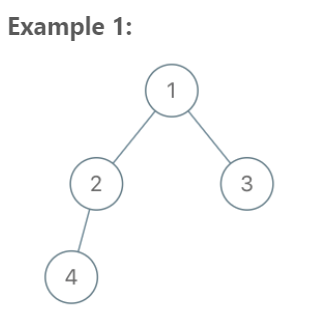

In [11]:
from IPython.display import Image
Image(filename = '.\Cousins in Binary Tree_Example1.jpg', width=120, height=120)

Input: root = [1,2,3,4], x = 4, y = 3  
Output: false

**DFS**

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isCousins(self, root: TreeNode, x: int, y: int) -> bool:
        from collections import defaultdict
        self.d = collections.defaultdict(tuple) #record parent and depth of each node
        self.dfs(root,None,0) #initialization
        px,dx = self.d[x]
        py,dy = self.d[y]
        return px==py and dx==dy
        
    def dfs(self,root,parent,depth):
        if not root: return
        self.d[root.val] = (parent,depth)
        self.dfs(root.left,root,depth+1)
        self.dfs(root.right,root,depth+1)       

**BFS**

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isCousins(self, root: TreeNode, x: int, y: int) -> bool:
        import collections
        m = collections.defaultdict(tuple)
        q = collections.deque()
        q.append((root, None))
        depth = 0
        while q:
            for i in range(len(q)):
                node, p = q.popleft()
                if not node: continue
                m[node.val] = (p, depth)
                q.append((node.left, node))
                q.append((node.right, node))
            depth += 1
        px, dx = m[x]
        py, dy = m[y]
        return dx == dy and px != py